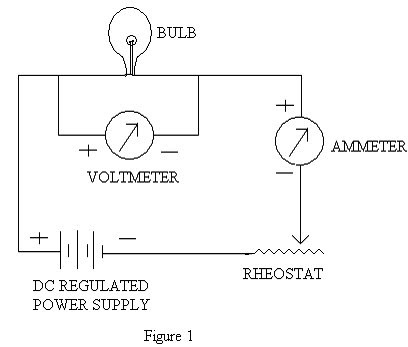

$T=t+273$

$R = \frac{V}{I}$

$P=V\times I$

$\displaystyle\frac{R_t}{R_d}=\frac{1+\alpha t+\beta t^2}{1+\alpha t_d+\beta t^2_d}$

In [1]:
import numpy as np
from sympy import *
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def fit(x,y):
    n = len(x)
    sx = sum(x)
    sy = sum(y)
    sx2 = sum(x**2)
    sxy = sum(x*y)
    b = (n*sx2 - sx**2)
    m = (n*sxy - sx*sy) / b
    c = (sy*sx2 - sx*sxy) / b
    return m,c

,t in C,T in k,$\frac{R_t}{R_d}$
0,127,400,0.42
1,327,600,0.70
2,527,800,1.00
3,727,1000,1.31
4,927,1200,1.63
5,1127,1400,1.97
6,1327,1600,2.33
7,1527,1800,2.70
8,1727,2000,3.08
9,1927,2200,3.48


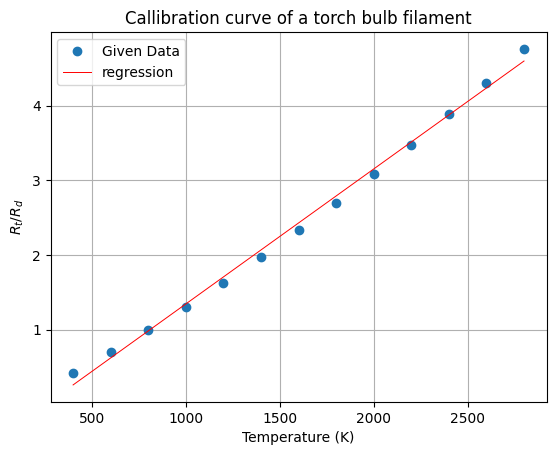

In [3]:
temperature_C = [127, 327, 527, 727, 927, 1127, 1327, 1527, 1727, 1927, 2127, 2327, 2527]  # Temperature in degree Celsius

def R_t_over_R_d(temperature_C, a=5.21e-3, b=7.2e-7, t_d=527):
    dnum = 1 + a*t_d + b*t_d**2 
    num = [(1 + a*t + b*t**2)/dnum  for t in temperature_C]
    return np.round(num,2)
    
R_t_R_d = R_t_over_R_d(temperature_C)   
temperature_K = [t + 273 for t in temperature_C] # Convert temperature to Kelvin
chart = pd.DataFrame({"t in C" : temperature_C , "T in k" : temperature_K , r"$\frac{R_t}{R_d}$" : R_t_R_d})
display(chart)

plt.plot(temperature_K, R_t_R_d, 'o', label='Given Data')

A1=chart.to_numpy()
x=A1[:,1]
y=A1[:,2]
m,c=fit(x[:],y[:])
Y=m*x+c
plt.plot(x,Y, 'r',linewidth=0.7,label='regression')
plt.xlabel('Temperature (K)')
plt.ylabel(r'$R_t/R_d$')
plt.title("Callibration curve of a torch bulb filament")
plt.grid(True)
plt.legend()
plt.show()

In [4]:
n = 2

# Just Glow
V_G=[0.4, 0.41] 
I_G=[160, 159]

# cease to glow
V_C=[0.4, 0.42]
I_C=[160, 162]

def Draper_point(n):
    R = []
    for i in range(n):
        R_dg = (V_G[i]*1e3) / I_G[i]
        R_dc = (V_C[i]*1e3) / I_C[i]
        R.append(R_dg)
        R.append(R_dc)
    R_D = np.mean(R)
    return R_D

R_D = np.round(Draper_point(n),2)
print('R_d :', R_D)

R_d : 2.54


In [5]:
def interp(x_vals, y_vals, x_query):
    results = []
    for xq in x_query:
        # Find where xq lies between two calibration points
        for i in range(len(x_vals) - 1):
            if x_vals[i] <= xq <= x_vals[i+1]:
                # Linear interpolation
                slope = (y_vals[i+1] - y_vals[i]) / (x_vals[i+1] - x_vals[i])
                yq = y_vals[i] + slope * (xq - x_vals[i])
                results.append(yq)
                break
    return np.array(results)

,I in mA,P.d in V,$ R_t=\frac{V}{I}$ in $ \Omega $,$R_t/R_d$,Temp in K from graph,Power $(P=V.I)$ in mW,$log_{10} $ T,$log_{10} $ P
0,160,0.40,2.500000,0.984252,789.501312,64.0,6.671401,4.158883
1,180,0.64,3.555556,1.399825,1056.140639,115.2,6.962377,4.746670
2,200,0.82,4.100000,1.614173,1190.108268,164.0,7.081800,5.099866
3,230,1.09,4.739130,1.865799,1338.705520,250.7,7.199458,5.524257
4,250,1.38,5.520000,2.173228,1512.904637,345.0,7.321787,5.843544
5,280,1.73,6.178571,2.432508,1655.409966,484.4,7.411804,6.182911
6,300,1.90,6.333333,2.493438,1688.345038,570.0,7.431504,6.345636
7,320,2.25,7.031250,2.768209,1835.899295,720.0,7.515290,6.579251
8,350,2.61,7.457143,2.935883,1924.148955,913.5,7.562239,6.817283


Slope (m) : 3.583606654494306


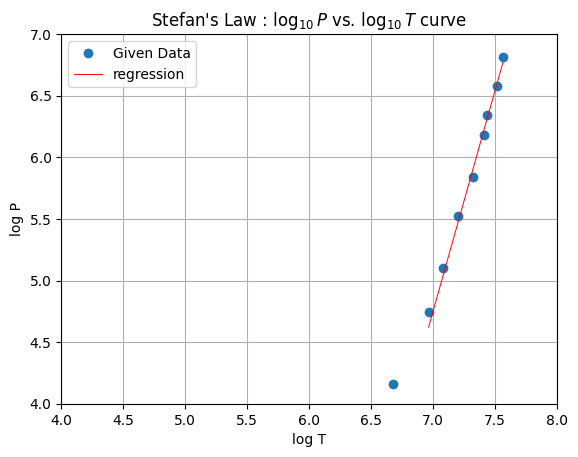

In [6]:
I = [160, 180, 200, 230, 250, 280, 300, 320, 350] # Current in mA
V = [0.40, 0.64, 0.82, 1.09, 1.38, 1.73, 1.90, 2.25, 2.61] # Potential diff. in V

R_t = [(v*1e3) / i for v,i in zip(V,I)]
R_d = R_D #2.50
R = [r_t/R_d for r_t in R_t]
P = [v*i for v,i in zip(V,I)]
T = interp(R_t_R_d, temperature_K, R)
lnT = np.log(T)
lnP = np.log(P)

F_Chart = pd.DataFrame({'I in mA' : I, 'P.d in V' : V, r"$ R_t=\frac{V}{I}$ in $ \Omega $" : R_t, 
                        r'$R_t/R_d$' : R , 'Temp in K from graph' : T,'Power $(P=V.I)$ in mW ' : P ,
                        '$log_{10} $ T' : lnT , '$log_{10} $ P' : lnP})

display(F_Chart)

plt.plot(lnT, lnP, 'o', label='Given Data')

A2=F_Chart.to_numpy()
x=A2[:,6]
y=A2[:,7]

m,c=fit(x[3:],y[3:])
Y=m*x+c

print('Slope (m) :', m)
plt.plot(x[1:],Y[1:], 'r',linewidth=0.7,label='regression')
plt.xlabel('log T')
plt.ylabel('log P')
plt.xlim(4,8)
plt.ylim(4,7)
plt.title(r"Stefan's Law : $\log_{10} P$ vs. $\log_{10} T$ curve")
plt.grid(True)
plt.legend()
plt.show()